In [1]:
#Install Biopython
#Install seaborn

In [2]:
conda install biopython

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install seaborn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

1. Documenting Dr. X's functions: Description of what the functions and information about the return types and arguments

In [5]:
def get_sequences_from_file(fasta_fn):
# This string returns only the sequence that are located in fast_fn file
    
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
# This loop opens an empty directory "sequence_data_dict" that would be used to 
# save data and also uses biopython packages SeqIO to parse or split the 
# description of the sequence from fasta file for each word to appear on a single line.
       
        species_name = description[1] + " " + description[2]
# This string takes the first and second rows from the description list and 
# arrange them together with a space in between using the "+" operator, and 
# the return string is assigned a variable "species_name"

        sequence_data_dict[species_name] = record.seq
# This script retrive respective sequence data from current record and saves it
# in the dictionary format for easy access to the sequences by species name
   
    return(sequence_data_dict)
# This string closes the for-loop and stores the resultant dictionary created to memory

2: String-Translate Function: write a function thats translates sequence

In [6]:
from Bio.Data import CodonTable
from Bio.Seq import Seq

In [7]:
def translate_function(string_nucleotides):
# This code considers "string_nucleotides" as a parameter
  
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
# this defines the condo table to be use as "Vertebrate Mitochondrial"
    
    aa_seq_string = ''
    for i in range(1, len(string_nucleotides), 3):
# This opens an empty string "aa_seq_string" that would be used to save the nucleotide 
# sequences and for-loop through every 3rd position in string_nucleotides. 

        codon = string_nucleotides[i:i+3]
        if codon in ["TAA", "TAG", "AGA", "AGG"]:
# This string considers a codon to be every other three nucleotides in length and
# stops the reading or leave it off if we see any of these stop condons in the sequence.
 
            aa_seq_string = aa_seq_string+mito_table.forward_table[codon]
    return(aa_seq_string)
# This string obtains the finall amino acid sequence by codon laters from the mito_table 
# to the identified codons and closes the for-loop and stores the resultant string created to memory


3. Alternative translation function

In [8]:
def translate_viaLib(string_nucleotides):
# This uses the Biopython translate() function to translate the string_nucleotides

    seq_string = Seq.translate(string_nucleotides, table=2, to_stop=True)
# The string_nucleotides sequence is translated into a protein sequence using a  
# the Vertebrate Mitochondial table-2 and stops reading at the first stop condon that is encountered
    
    return seq_string 
# This string stores the resultant string as the output sequence

4. Count Amino Acid analysis function

In [9]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):
# This considers amino acid (aa) as the parameter to be computed
     
    temp_aa = ProteinAnalysis(aa_seq)
# Because of the stop codons in the amino acid sequence, ProteinAnalysis function 
# on aa_seq makes a temporary sequence as a string

    molecular_wt = temp_aa.molecular_weight() 
    return molecular_wt
# This string calculate the mol.wt for the temporary protein and returns the 
# resultant string as a molecualr_wt

5. GC content analysis funtion

In [10]:
def gc_content(dna_string):
# This considers the "dna_string" as the parameter of intrest

    g_count = dna_string.count("G") 
# This gives the proportion of G or the number of times G appears in the DNA sequence
    
    c_count = dna_string.count("C") 
# This gives the proportion of C or the number of times C appears in the DNA sequence
    
    string_length = len(dna_string) 
# This computes the length of the sequence in the dna_string

    gc = (c_count+g_count)/string_length 
    return  gc
# This gives the summation the g and c and returns the value as a ratio of the entire sequence length

In [11]:
#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

In [12]:
import numpy as np
penguin = 'penguins_cytb.fasta'
cytb_seqs = get_sequences_from_file(penguin)
# This assigns a new name "penguin" to the fasta file

In [13]:
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass
# This assigns a new name "penguins_df" to the csv text file

In [14]:
species_list = list(penguins_df.species)
# This provides the list of species from the newly created "enguins_df" file

6. Additional columns to the penguin DataFrame

In [16]:
for index, row in penguins_df.iterrows():
# This is used when looping through the rows in penguins_df file and assigns 
# two values to the index and row variables.

            penguins_df.loc[index,'Molecular_wt'] = 'NaN'
            penguins_df.loc[index,'GC content'] = 'NaN'
# This code creates two new columns with the label "Molecular_wt" and "GC content" penguins_df 
# file and sets the value to 'NaN' to indicate that these cells are currently empty

7. Translate DNA sequence and asign comupted molecular weight and GC content to their respective new columns

In [17]:
molecular_wt_list = []
gc_content_list = []
# This creates an empty list to save the molecular weights and GC contents.

for key, value in cytb_seqs.items():
    aa_seq = translate_viaLib(value) 
# This for-loop translates the dna sequence from cytb_seqs data. 
   
    molecular_wt = compute_molecular_weight(str(aa_seq))
    gc_prop = gc_content(value) 
    molecular_wt_list.append(molecular_wt)
    gc_content_list.append(gc_prop)
# These code computes the molecular weight sequence and the propotion of GC content and adds the computed 
# molecular weight and GC content to the "molecular_wt_list" and "gc_content_list", respectively.
   
penguins_df["Molecular_wt"] = molecular_wt_list
penguins_df["GC content"] = gc_content_list
# This code replace the empty column 'NaN' with thefinal computated result for molecular weight and gc content.

8. Data visualization:Plot graph of adult body mass per specie with description

<Axes: title={'center': 'Adult body mass per species'}, xlabel='species'>

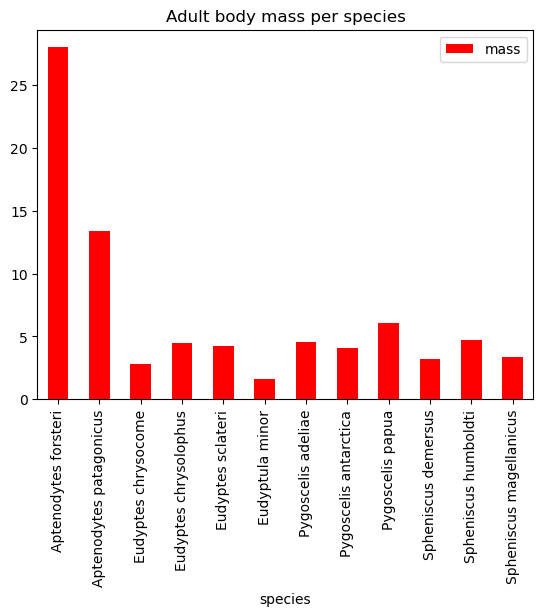

In [18]:
%matplotlib inline
# This function allows to visualize graphes while working in jupyter notebook.

penguins_df.plot(kind='bar',x='species',y='mass', color='red', title='Adult body mass per species')
# This plots a bar chart with x-axis labeled as the "species names" and  y-axis label as "mass"

Q1* The smallest penguin species is Eudyptula minor 

Q2* Eudyptula minor species are found throughout the southern coast of Australia and as far north as the South Solitary Island off the coast of New South Wales. They are native to the coasts of New Zealand.

9. Visualization graph of Molecular weight and GC-content

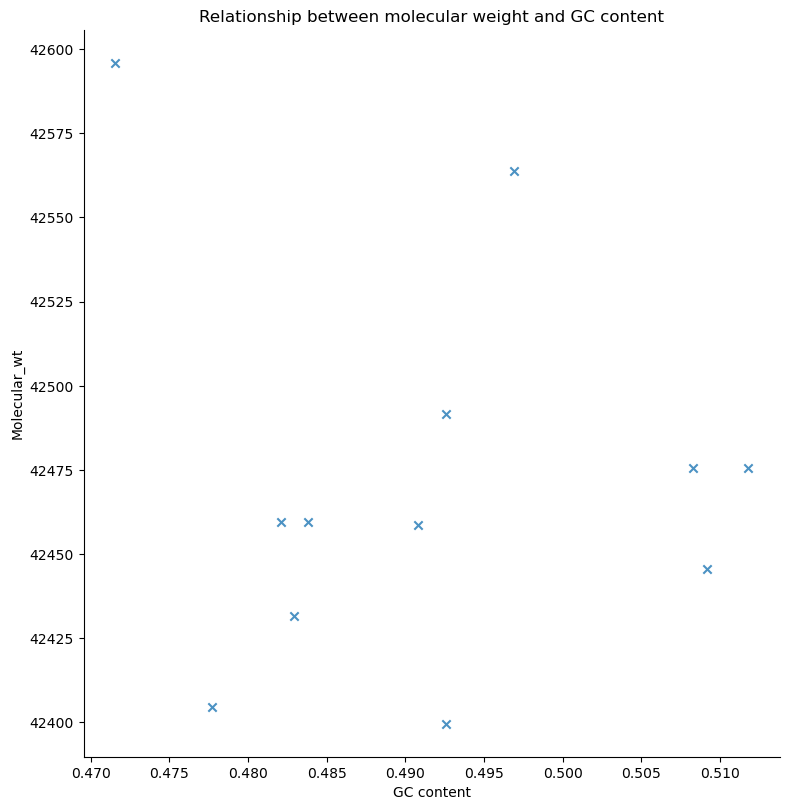

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# This import seaborn and matplotlib.pyplot, aliasing them as 'sns' and 'plt' respectively 

sns.lmplot(x="GC content", y="Molecular_wt", data=penguins_df, fit_reg=False, height=8, aspect=1, markers='x')
plt.title('Relationship between molecular weight and GC content')
plt.show()
# This uses the seaborn function .1mplot to plot the GC content on the x-axis and Molecular_wt on the y-axis.
# Uses use the fit_reg=False argument to remove the default regression line, while using the the 
# size and aspect arguments to control the height and width of the objext markers "x". 
# Then uses the .title and .show function to display the scatterplot with title.

10. Saving the entire DataFrame to a new CSV

In [20]:
penguins_df.to_csv('penguins_mass_cytb.csv', index=False)

11. Creativity with plot for bonus

Text(0.5, 1.0, 'Relationship between GC Content and Molecular Weight in penguin species')

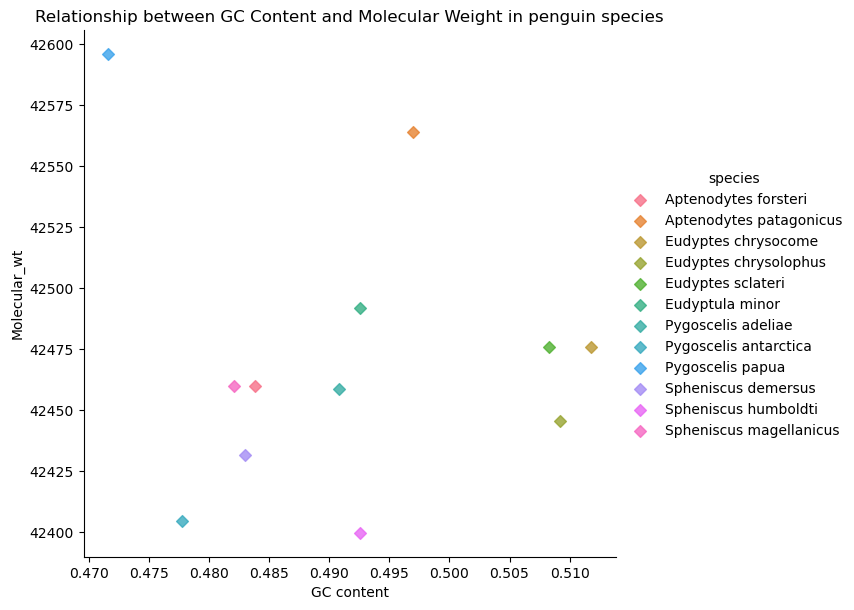

In [21]:
# I want to determine if there is any any patterns or differences between the penguin species,
# by visualizing the relationship between GC content and molecular weight in different species of penguins

sns.lmplot(x="GC content", y="Molecular_wt", data=penguins_df, 
           fit_reg=False, height=6, aspect=1.1, hue='species', markers='D')
plt.title('Relationship between GC Content and Molecular Weight in penguin species')